# Mobile Legends: Bang Bang 2022 Heroes Stats - Analysis
In this notebook, the stats of the heroes of the Mobile Legends game in 2022 will be analysed, so that some relevant informations can be extracted not only about the champions, but also about the Mobile Legends esports scenario. The purpose of this notebook is to learn and get some relevant insights from the Mobile Legends data (Mobile Legends Version Patch 1.7.20 September 20, 2022), downloaded from Kaggle. 

Dataset link: https://www.kaggle.com/datasets/kishan9044/mobile-legends-bang-bang

The main topics of this notebook are:
* Libraries Import
* Data Loading
* Data Cleaning, Transformation and Exploratory Data Analysis
    * Data visualization and exploration
    * Esports analysis
* Main Conclusions

## 1. Importing libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
import warnings
import os
from sklearn import preprocessing

In [54]:
os.environ['OMP_NUM_THREADS'] = '1'
warnings.filterwarnings("ignore", message="Parsing dates in DD/MM/YYYY format when dayfirst=False")

## 2. Loading the data
In this section, the Mobile Legends Heroes Stats 2022 dataset is readed.

In [55]:
dataset_path = 'Mlbb_Heroes.csv'
dataset_df = pd.read_csv(dataset_path)

## 3. Data Cleaning, Transformation, and Exploratory Data Analysis

Along this section, we proceed for the data understanding by EDA and by performing data cleaning and transformation, for a more composite analysis. 

In [56]:
dataset_df.head()

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",10/25/2021,Assassin,NaN,Jungler,2614,8.0,455,21.0,115,0,19,15,250,43,42
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,12.0,115,0,24,15,260,540,524
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,NaN,EXP Lane,2718,9.8,405,18.0,129,0,21,15,260,95,92
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,NaN,EXP Lane,2646,7.8,453,31.0,121,0,25,15,260,24,33


In [57]:
# Check all the features 
dataset_df.columns

Index(['Name', 'Title', 'Voice_Line', 'Release_Date', 'Primary_Role',
       'Secondary_Role', 'Lane', 'Hp', 'Hp_Regen', 'Mana', 'Mana_Regen',
       'Phy_Damage', 'Mag_Damage', 'Phy_Defence', 'Mag_Defence', 'Mov_Speed',
       'Esport_Wins', 'Esport_Loss'],
      dtype='object')

In [58]:
# Drop unnecessary features for analysis
dataset_df = dataset_df.drop(columns=['Title', 'Voice_Line', 'Secondary_Role', 'Mag_Damage'])

Magic Damage was also dropped, because all the column is set to zero, which means that all the champions basic counts as Physical Damage

In [59]:
dataset_df.head()

,Name,Release_Date,Primary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
0,Aamon,10/25/2021,Assassin,Jungler,2614,8.0,455,21.0,115,19,15,250,43,42
1,Akai,2016,Tank,Roamer,2769,8.4,422,12.0,115,24,15,260,540,524
2,Aldous,2018,Fighter,EXP Lane,2718,9.8,405,18.0,129,21,15,260,95,92
3,Alice,2016,Mage,EXP Lane,2573,7.2,493,18.0,114,21,15,240,364,352
4,Alpha,2017,Fighter,EXP Lane,2646,7.8,453,31.0,121,25,15,260,24,33


In [60]:
# Check the shape of the data
dataset_df.shape

(114, 14)

In [61]:
# Check the data types and non-null values
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          114 non-null    object 
 1   Release_Date  114 non-null    object 
 2   Primary_Role  114 non-null    object 
 3   Lane          114 non-null    object 
 4   Hp            114 non-null    int64  
 5   Hp_Regen      114 non-null    float64
 6   Mana          114 non-null    int64  
 7   Mana_Regen    113 non-null    float64
 8   Phy_Damage    114 non-null    int64  
 9   Phy_Defence   114 non-null    int64  
 10  Mag_Defence   114 non-null    int64  
 11  Mov_Speed     114 non-null    int64  
 12  Esport_Wins   114 non-null    int64  
 13  Esport_Loss   114 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 12.6+ KB


In [62]:
# Basic stats about the numerical features
dataset_df.describe()

,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
count,114.000000,114.000000,114.000000,113.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2577.850877,7.698246,339.368421,14.929204,115.929825,19.201754,14.912281,251.175439,289.859649,289.710526
std,213.281700,1.639392,215.071598,22.981249,9.826566,3.582603,0.659329,8.665102,275.362187,273.140753
min,918.000000,3.800000,0.000000,0.000000,90.000000,10.000000,10.000000,240.000000,0.000000,3.000000
25%,2501.000000,6.800000,100.000000,4.000000,110.000000,17.000000,15.000000,240.000000,68.250000,71.750000
50%,2573.000000,7.200000,436.500000,15.000000,116.500000,19.000000,15.000000,251.000000,226.500000,222.500000
75%,2706.250000,8.000000,490.000000,18.000000,122.500000,22.000000,15.000000,260.000000,465.000000,457.750000
max,2909.000000,18.400000,750.000000,240.000000,140.000000,27.000000,15.000000,270.000000,1357.000000,1529.000000


In [63]:
# Check for missing values
dataset_df.isnull().sum()

Name            0
Release_Date    0
Primary_Role    0
Lane            0
Hp              0
Hp_Regen        0
Mana            0
Mana_Regen      1
Phy_Damage      0
Phy_Defence     0
Mag_Defence     0
Mov_Speed       0
Esport_Wins     0
Esport_Loss     0
dtype: int64

In [64]:
# Verify the missing value origin
dataset_df.loc[dataset_df['Mana_Regen'].isnull()]

,Name,Release_Date,Primary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
108,Yin,1/18/2022,Fighter,EXP Lane,2578,9.8,0,NaN,109,21,15,252,52,45


In [65]:
# Replace the missing value with zero
dataset_df['Mana_Regen'].fillna(0, inplace=True)

In [66]:
# Check for duplicated data
dataset_df.duplicated().sum()

0

In [67]:
# Ensure that there are no repeated names
print(dataset_df["Name"].unique())
print(len(dataset_df["Name"].unique()))

['Aamon' 'Akai' 'Aldous' 'Alice' 'Alpha' 'Alucard' 'Angela' 'Argus'
 'Atlas' 'Aurora' 'Aulus' 'Badang' 'Balmond' 'Bane' 'Barats' 'Baxia'
 'Beatrix' 'Belerick' 'Benedetta' 'Brody' 'Bruno' 'Carmilla' 'Cecilion'
 "Chang'e" 'Chou' 'Claude' 'Clint' 'Cyclops' 'Diggie' 'Dyrroth'
 'Esmeralda' 'Edith' 'Estes' 'Eudora' 'Fanny' 'Faramis' 'Floryn' 'Franco'
 'Fredrinn' 'Freya' 'Gatotkaca' 'Gloo' 'Gord' 'Granger' 'Grock'
 'Guinevere' 'Gusion' 'Hanabi' 'Hanzo' 'Harith' 'Harley' 'Hayabusa'
 'Helcurt' 'Hilda' 'Hylos' 'Irithel' 'Jawhead' 'Johnson' 'Julian' 'Kadita'
 'Kagura' 'Kaja' 'Karina' 'Karrie' 'Khaleed' 'Khufra' 'Kimmy' 'Lancelot'
 'Lapu-Lapu' 'Layla' 'Leomord' 'Lesley' 'Ling' 'Lolita' 'Lunox' 'Luo_Yi'
 'Lylia' 'Mathilda' 'Martis' 'Masha' 'Melissa' 'Minotaur' 'Minsitthar'
 'Miya' 'Moskov' 'Nana' 'Natan' 'Natalia' 'Odette' 'Pharsa' 'Phoveus'
 'Popol_and_Kupa' 'Paquito' 'Rafaela' 'Roger' 'Ruby' 'Selena' 'Silvanna'
 'Terizla' 'Thamuz' 'Uranus' 'Vale' 'Valentina' 'Valir' 'Vexana' 'Wanwan'
 'Xavier' 'X

In [68]:
# Check the classes in Primary Role column
dataset_df["Primary_Role"].unique()

array(['Assassin', 'Tank', 'Fighter', 'Mage', 'Support', 'Marksman'],
      dtype=object)

In [69]:
# Check the classes in Lane column
dataset_df["Lane"].unique()

array(['Jungler', 'Roamer', 'EXP Lane', 'Mid', 'Gold Lane'], dtype=object)

Creating more 3 columns (features) with informations about the total number of times that the champion was picked on the eSports competition, as well as their win rate and lose rate percentage.

In [70]:
# Add more information and visualize the data
dataset_df["Total_Esport_Picks"] = dataset_df['Esport_Wins'] + dataset_df['Esport_Loss']
dataset_df["Esport_Win_rate"] = (dataset_df['Esport_Wins'] / dataset_df['Total_Esport_Picks'])*100
dataset_df["Esport_Lose_rate"] = (dataset_df['Esport_Loss'] / dataset_df['Total_Esport_Picks'])*100
dataset_df.tail()

,Name,Release_Date,Primary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss,Total_Esport_Picks,Esport_Win_rate,Esport_Lose_rate
109,Yi_Sun-Shin,2017,Assassin,Jungler,2570,7.2,438,15.0,100,22,15,250,443,383,826,53.631961,46.368039
110,Yu_Zhong,6/19/2020,Fighter,EXP Lane,2698,11.8,0,0.0,129,21,15,245,550,594,1144,48.076923,51.923077
111,Yve,2/12/2021,Mage,Mid,2651,7.2,510,21.0,115,19,15,255,834,722,1556,53.598972,46.401028
112,Zhask,11/27/2017,Mage,Mid,2401,6.8,490,20.0,107,15,15,240,37,46,83,44.578313,55.421687
113,Zilong,2016,Fighter,Gold Lane,2689,7.0,405,16.0,123,25,15,265,5,23,28,17.857143,82.142857


In [71]:
# Check all the features 
dataset_df.columns

Index(['Name', 'Release_Date', 'Primary_Role', 'Lane', 'Hp', 'Hp_Regen',
       'Mana', 'Mana_Regen', 'Phy_Damage', 'Phy_Defence', 'Mag_Defence',
       'Mov_Speed', 'Esport_Wins', 'Esport_Loss', 'Total_Esport_Picks',
       'Esport_Win_rate', 'Esport_Lose_rate'],
      dtype='object')

### Data visualization and exploration
In order to continue the data analysis, the data were visualised for a better understanding.

#### Correlation between basic champions stats

The correlation between all the basic champions statistics was computed and the heatmap with the correlations values are shown below. Just a half ot the heatmap is presented, because the correlation matrix is symetric which means that the values in the lower and upper triangle are the same. 

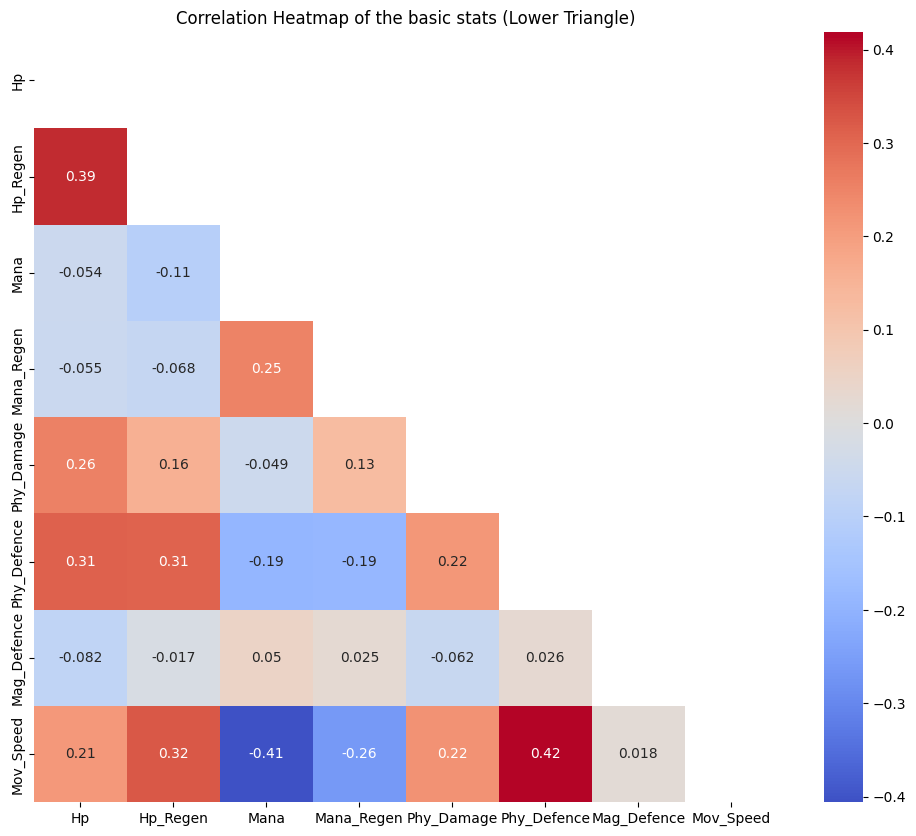

In [72]:
# Select the variables to be in the correlation matrix
champ_stats = ['Hp', 'Hp_Regen', 'Mana', 'Mana_Regen', 'Phy_Damage', 'Phy_Defence', 'Mag_Defence', 'Mov_Speed']

# Compute the correlation matrix
correlation_matrix = dataset_df[champ_stats].corr()

# Plot a heatmap of the lower triangle of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap of the basic stats (Lower Triangle)')
plt.show()

#### Relationship between the champion Lane and his points of life, Hp

The next visualisation represented below is a boxplot to interpret the relationship and distribution of each champion's life points, Hp, with its corresponding lane, where, in this type of games, they have a strong relation. It is expected then that, generally, lanes such as Roamer and EXP have higher values, and the gold lane lower values.
The boxplot give us information about possible champions that are beyond the upper and lower limits of the boxplot, so they could be outliers and the lane corresponding to the champion is not theirs, they could be also champions that use different hp systems, or even normal cases.  

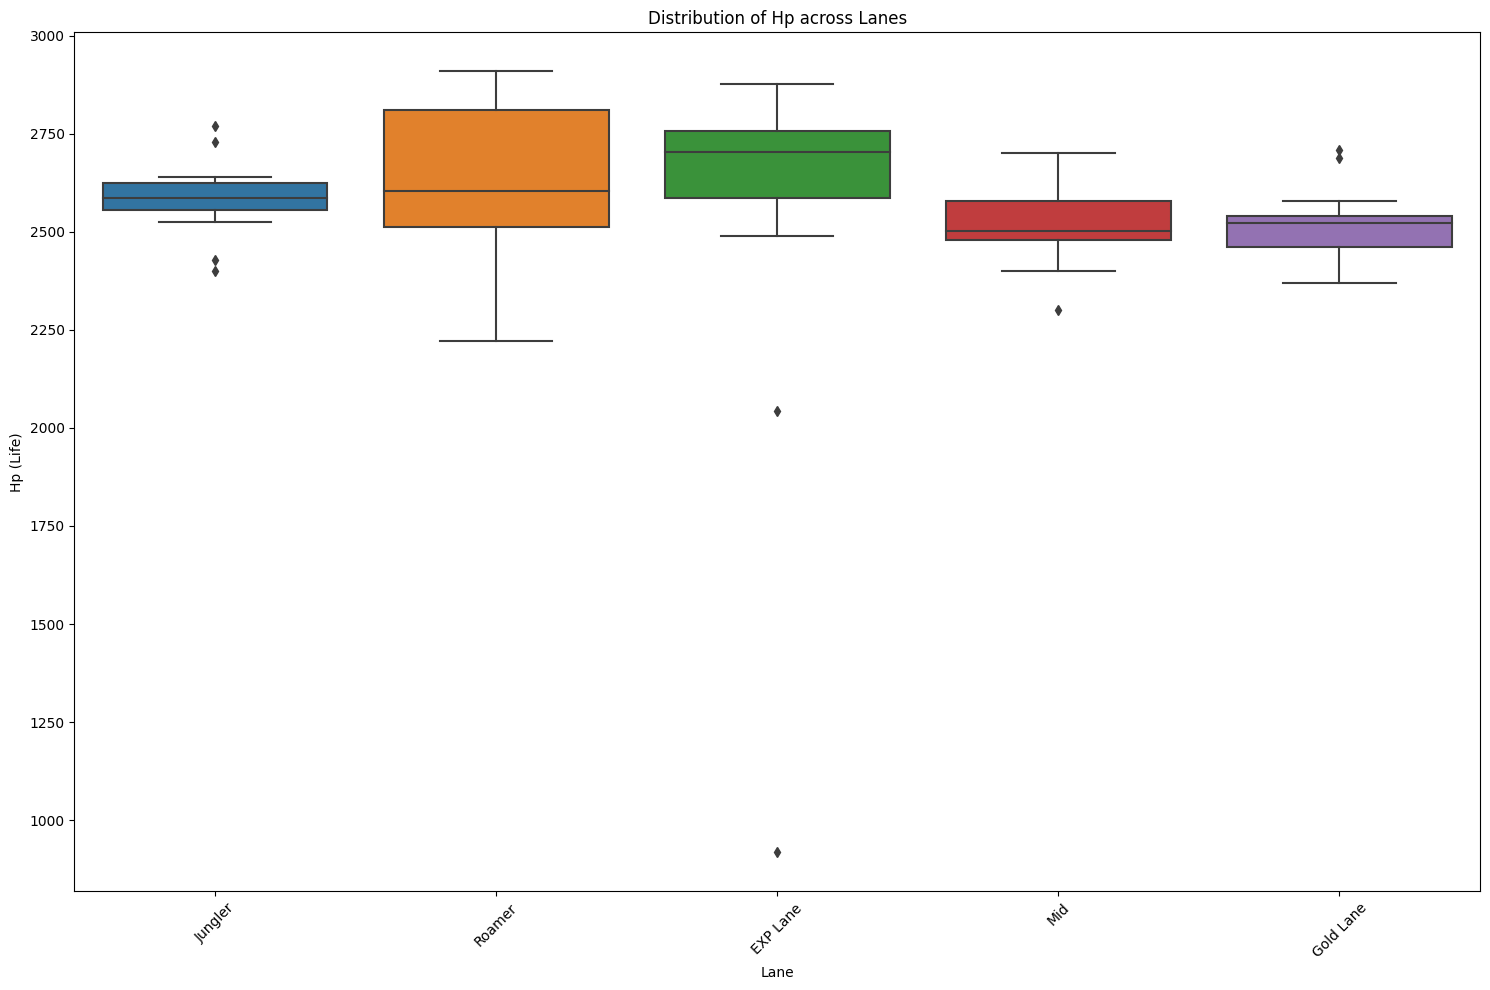

In [73]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Lane', y='Hp', data=dataset_df)
plt.title('Distribution of Hp across Lanes')
plt.xlabel('Lane')
plt.ylabel('Hp (Life)')
plt.xticks(rotation=45)
plt.tight_layout()          
plt.show()

It is visible that for each Lane there are cases outside the Interquartil, maximum and minimum ranges, so I proceeded to understand and analyze these cases. For a better visualization and fast checking I decided to plot horizontal lines to define the regions of interest.

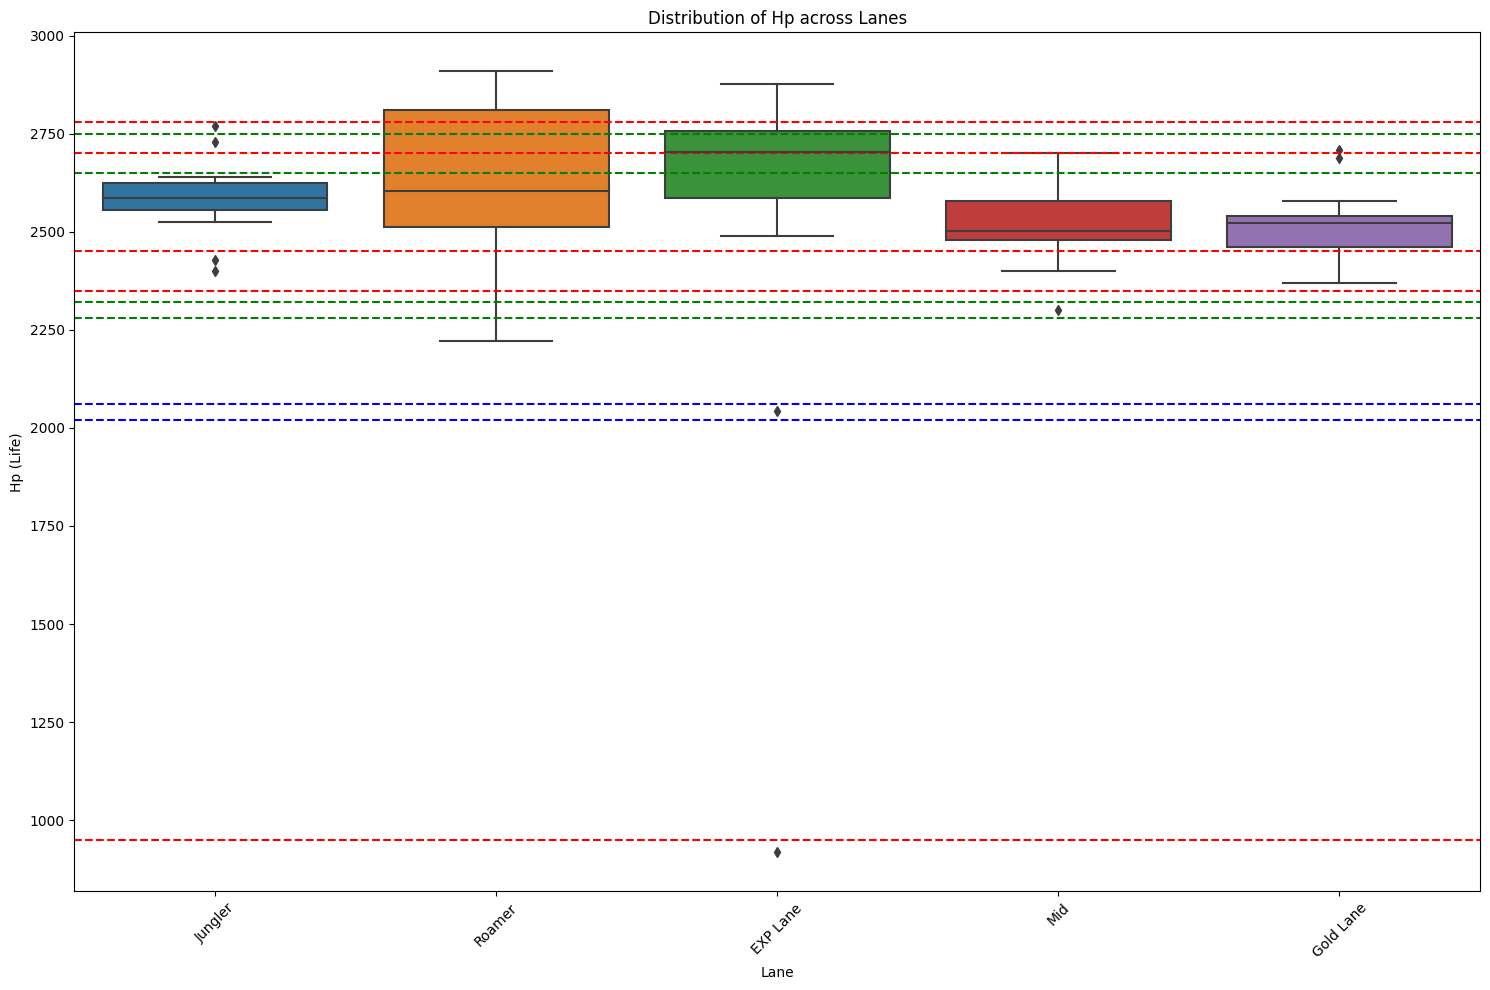

In [74]:
# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Lane', y='Hp', data=dataset_df)
plt.title('Distribution of Hp across Lanes')
plt.xlabel('Lane')
plt.ylabel('Hp (Life)')
plt.xticks(rotation=45)

# EXP Lane
plt.axhline(y=950, color='red', linestyle='--')

plt.axhline(y=2020, color='blue', linestyle='--')
plt.axhline(y=2060, color='blue', linestyle='--')

# Mid Lane
plt.axhline(y=2320, color='green', linestyle='--')
plt.axhline(y=2280, color='green', linestyle='--')

# Gold Lane
plt.axhline(y=2650, color='green', linestyle='--')
plt.axhline(y=2750, color='green', linestyle='--')

# Jungle Lane
plt.axhline(y=2450, color='red', linestyle='--')
plt.axhline(y=2350, color='red', linestyle='--')

plt.axhline(y=2700, color='red', linestyle='--')
plt.axhline(y=2780, color='red', linestyle='--')
 
plt.tight_layout()          
plt.show()

The results of the analysis are shown below:

In [75]:
dataset_df.loc[(dataset_df['Hp']<950) & (dataset_df['Lane'] == 'EXP Lane'), 'Name']

107    X.Borg
Name: Name, dtype: object

X.Borg has less Hp because he uses a different Hp system which is a combination of Hp and Armor Hp.

In [76]:
dataset_df.loc[(dataset_df['Hp']>2020) & (dataset_df['Hp']<2060) & (dataset_df['Lane'] == 'EXP Lane'), 'Name']

79    Masha
Name: Name, dtype: object

Masha is one of the champions that has more than one Hp bar, so the value outside the box is way of equilibrium.

In [77]:
dataset_df.loc[(dataset_df['Hp']>2280) & (dataset_df['Hp']<2320) & (dataset_df['Lane'] == 'Mid'), 'Name']

23    Chang'e
Name: Name, dtype: object

Everything alright with Chang'e.


In [78]:
dataset_df.loc[(dataset_df['Hp']>2650) & (dataset_df['Hp']<2750) & (dataset_df['Lane'] == 'Gold Lane'), 'Name']

24       Chou
113    Zilong
Name: Name, dtype: object

Zilong and Chou are outliers in the Gold Lane. They both belong to the EXP Lane. (based on the official Mobile Legends site) 

In [79]:
dataset_df.loc[(dataset_df['Hp']>2350) & (dataset_df['Hp']<2450) & (dataset_df['Lane'] == 'Jungler'), 'Name']

51    Hayabusa
96      Selena
Name: Name, dtype: object

Everything alright with Hayabusa and Selena.

In [80]:
dataset_df.loc[(dataset_df['Hp']>2700) & (dataset_df['Hp']<2780) & (dataset_df['Lane'] == 'Jungler'), 'Name']

15    Baxia
94    Roger
Name: Name, dtype: object

Baxia and Roger are outliers in the Jungle Laner. Baxia is Roamer and Roger belongs to the Jungle Lane. (based on the official Mobile Legends site) 


Given the results, there were outliers on each Lanes, so the true Lanes were updated for Zilong, Chou, Baxia and Roger.

In [81]:
# Get the index of Zilong and Chou in the dataset
zilong_idx = dataset_df[dataset_df['Name'] == 'Zilong'].index
chou_idx = dataset_df[dataset_df['Name'] == 'Chou'].index
new_lane_value = 'EXP Lane' 

# Update the correct lane for each champion
dataset_df.loc[zilong_idx, 'Lane'] = new_lane_value
dataset_df.loc[chou_idx, 'Lane'] = new_lane_value

# Get the index of Zilong and Chou in the dataset
baxia_idx = dataset_df[dataset_df['Name'] == 'Baxia'].index
roger_idx = dataset_df[dataset_df['Name'] == 'Roger'].index
new_lane_baxia = 'Roamer' 
new_lane_roger = 'Jungler' 

# Update the correct lane for each champion
dataset_df.loc[baxia_idx, 'Lane'] = new_lane_baxia
dataset_df.loc[roger_idx, 'Lane'] = new_lane_roger

#### Total existing champions in each Lane
Now that the champions have their Lane right, the number of champions per Lane was calculated, the bar plot displayed and the name of the champions aggruped by Lane.

In [82]:
# Count the nº of champions in each lane
lane_count = dataset_df["Lane"].value_counts()
print(lane_count)

EXP Lane     36
Mid          23
Roamer       21
Gold Lane    19
Jungler      15
Name: Lane, dtype: int64


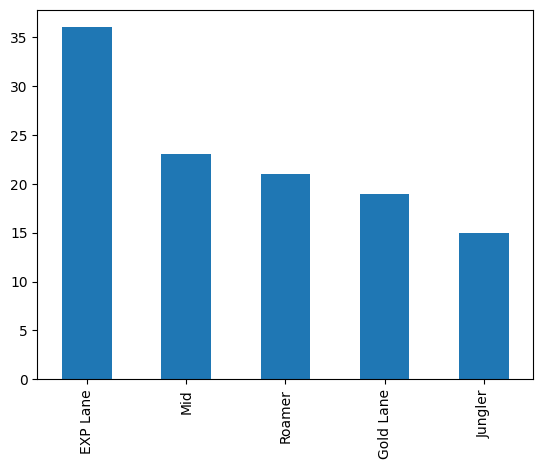

In [83]:
# Bar Plot
lane_count.plot(kind='bar')
plt.show()

In [84]:
# Display the champion names for each lane.
lanes = dataset_df.groupby('Lane')
for lane, group in lanes:
    print(f'{lane} Champions:')
    for name in group['Name']:
        print(name)
    print(len(group['Name']))
    print('\n')

EXP Lane Champions:
Aldous
Alice
Alpha
Argus
Aulus
Badang
Balmond
Barats
Benedetta
Chou
Dyrroth
Esmeralda
Edith
Fredrinn
Freya
Hilda
Jawhead
Julian
Kaja
Khaleed
Lapu-Lapu
Leomord
Martis
Masha
Minsitthar
Phoveus
Paquito
Ruby
Silvanna
Terizla
Thamuz
Uranus
X.Borg
Yin
Yu_Zhong
Zilong
36


Gold Lane Champions:
Beatrix
Brody
Bruno
Claude
Clint
Granger
Guinevere
Hanabi
Irithel
Karrie
Kimmy
Layla
Lesley
Melissa
Miya
Moskov
Natan
Popol_and_Kupa
Wanwan
19


Jungler Champions:
Aamon
Alucard
Bane
Fanny
Gusion
Hanzo
Hayabusa
Helcurt
Karina
Lancelot
Ling
Natalia
Roger
Selena
Yi_Sun-Shin
15


Mid Champions:
Aurora
Cecilion
Chang'e
Cyclops
Eudora
Gord
Harith
Harley
Kadita
Kagura
Lunox
Luo_Yi
Lylia
Nana
Odette
Pharsa
Vale
Valentina
Valir
Vexana
Xavier
Yve
Zhask
23


Roamer Champions:
Akai
Angela
Atlas
Baxia
Belerick
Carmilla
Diggie
Estes
Faramis
Floryn
Franco
Gatotkaca
Gloo
Grock
Hylos
Johnson
Khufra
Lolita
Mathilda
Minotaur
Rafaela
21




#### Number of existing champions for each Primary Role
In order to better understand the number of champions for each role (Fighter, Mage, Marksman, Tank, Assassin and Support) the graph of the distribution of primary roles as a function of the number of champions was displayed.

In [85]:
# Count the number of champions for each primary role
role_counts = dataset_df['Primary_Role'].value_counts()
print(role_counts)

Fighter     33
Mage        25
Marksman    18
Tank        16
Assassin    13
Support      9
Name: Primary_Role, dtype: int64


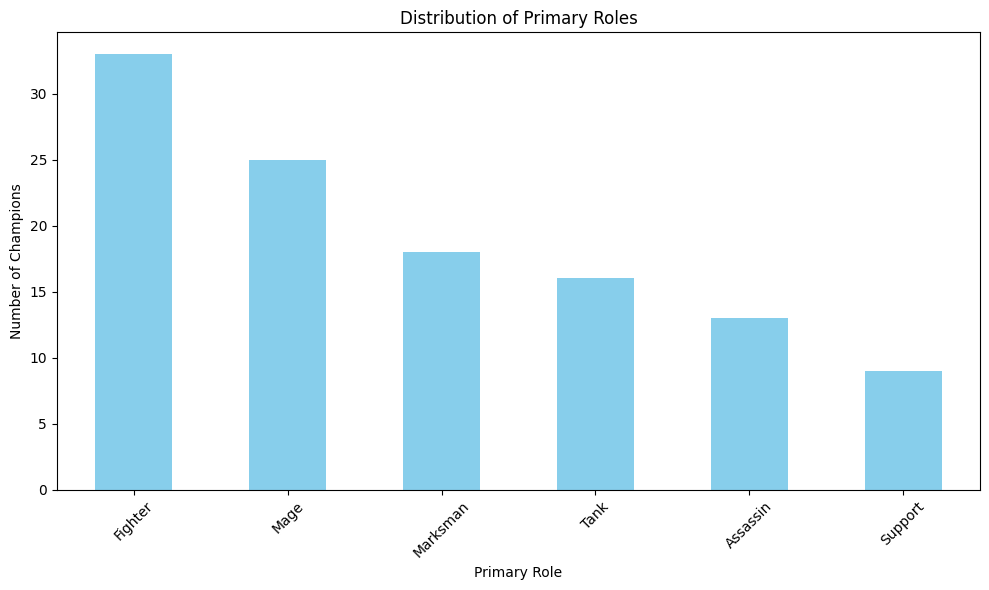

In [86]:
# Bar plot
plt.figure(figsize=(10, 6))
role_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Primary Roles')
plt.xlabel('Primary Role')
plt.ylabel('Number of Champions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Relationship between the champions Lane and their Primary Role 
Similarly, it is interesting to evaluate the relationship between the lane of each hero and their primary role. Thus, since Lane and Primary Role are two categorical variables, the method chosen to evaluate the association between the two variables was the chi square test. To do this, I started by making the contigency table and, from there, to checked whether the two variables are related from the p-value and the result of the statistical test.

In [87]:
# Make the contigency table
cont_table = pd.crosstab(dataset_df['Lane'], dataset_df['Primary_Role'])
print(cont_table)

# Compute the statistical test p value
stat, p, dof, expected = ss.chi2_contingency(cont_table)
critical = ss.chi2.ppf(0.95, dof)
print(f"Chi-Square Statistic: {stat}")
print(f"Critical Value: {critical}")
print(f"P-Value: {p}\n")

# Conclusion
if p < 0.05:
    print("H0 is rejected. There is a significant association between the two variales.")
else:
    print("H0 is not rejected. There is no significant association between the Lane and Primary Roles features.")

Primary_Role  Assassin  Fighter  Mage  Marksman  Support  Tank
Lane                                                          
EXP Lane             1       29     2         0        0     4
Gold Lane            0        1     0        18        0     0
Jungler             12        3     0         0        0     0
Mid                  0        0    23         0        0     0
Roamer               0        0     0         0        9    12
Chi-Square Statistic: 367.6523898323898
Critical Value: 31.410432844230918
P-Value: 1.0159585806064069e-65

H0 is rejected. There is a significant association between the two variales.


The heatmap of observed frequencies of the relation between the each Primary Role and each Lane is shown below: 

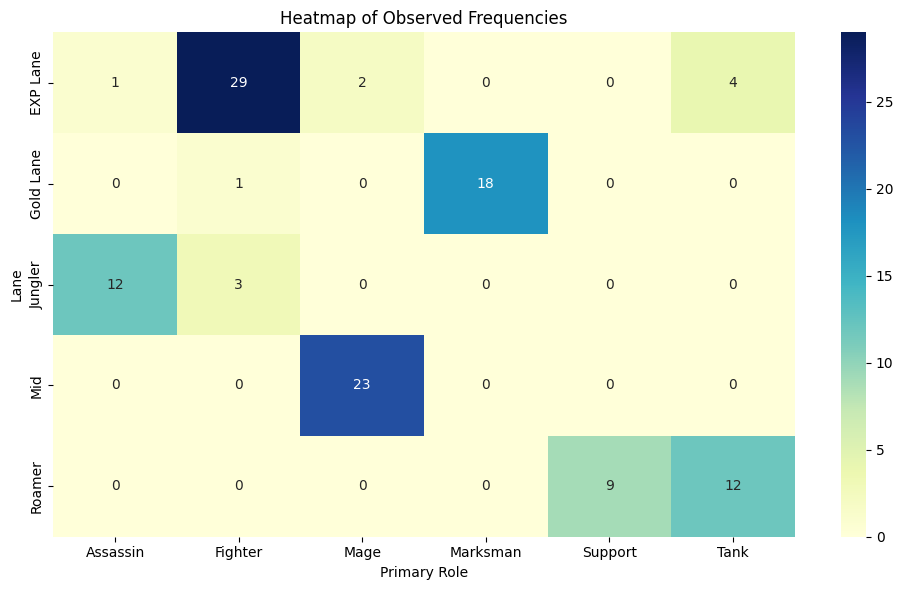

In [88]:
# Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(cont_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Observed Frequencies')
plt.xlabel('Primary Role')
plt.ylabel('Lane')
plt.tight_layout()
plt.show()

#### Mobile Legends tendency to launch champions
One piece of information that was also extracted was the trend of new champions being released by mobile legends, per lane, over the years until 2022. 

Lane          EXP Lane  Gold Lane  Jungler  Mid  Roamer
Release_Date                                           
2016               5.0        4.0      6.0  4.0     5.0
2017               5.0        3.0      4.0  7.0     6.0
2018               8.0        4.0      3.0  5.0     2.0
2019               7.0        3.0      1.0  2.0     3.0
2020               4.0        2.0      NaN  2.0     3.0
2021               4.0        2.0      1.0  2.0     2.0
2022               3.0        1.0      NaN  1.0     NaN


<Figure size 1200x600 with 0 Axes>

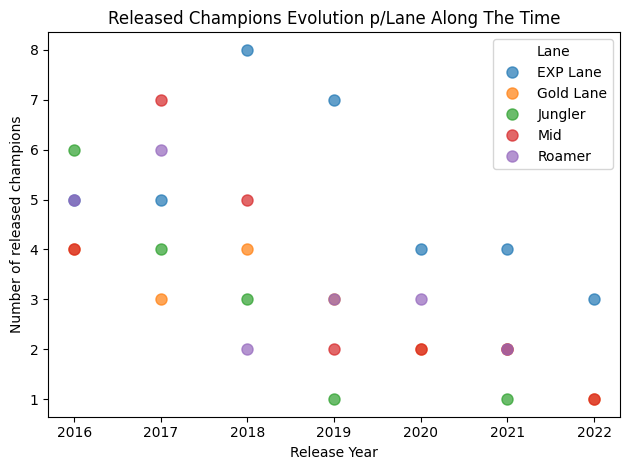

In [89]:
# Convert the Release_Date column into the date, time objects
dataset_df['Release_Date'] = pd.to_datetime(dataset_df['Release_Date'])

# Compute the number of champions per Lane per year 
lane_counts_by_year = dataset_df.pivot_table(index=dataset_df['Release_Date'].dt.year, columns='Lane', values='Name', aggfunc='count')
print(lane_counts_by_year)

# Plot the released champions evolution per Lane along the time
plt.figure(figsize=(12, 6))
lane_counts_by_year.plot(marker='o', markersize=8, linewidth=0, alpha=0.7)
plt.title('Released Champions Evolution p/Lane Along The Time')
plt.xlabel('Release Year')
plt.ylabel('Number of released champions')
plt.legend(title='Lane')
plt.tight_layout()
plt.show()

#### Mobile Legends release and first year champions
From this moment on, the dataset is ready to be analyzed and to extract some relevant information. 

I first started by analyzing the champions (or heroes) by checking the release dates of each hero and extracting the information that the release date of the oldest hero would match when the game was released. With it, the information about the champions that were present in the first year of Mobile Legends (older champions) was also displayed.

In [90]:
# Convert the Release_Date column into the date, time objects
dataset_df['Release_Date'] = pd.to_datetime(dataset_df['Release_Date'])

# Check the older date
old_champion_date = dataset_df['Release_Date'].min()
print(f'First year of Mobile Legends: {old_champion_date.year}')

# Present the older champions Name and Lane
print("2016 Released Champions:\n")
older_champions = dataset_df[(dataset_df['Release_Date'].dt.year == 2016)]
print(older_champions[['Name','Lane']])
print(f'\n{len(older_champions)} champions were released in 2016.')
lane_counts = older_champions['Lane'].value_counts()
print(lane_counts)

First year of Mobile Legends: 2016
2016 Released Champions:

         Name       Lane
1        Akai     Roamer
3       Alice   EXP Lane
5     Alucard    Jungler
12    Balmond   EXP Lane
13       Bane    Jungler
20      Bruno  Gold Lane
24       Chou   EXP Lane
26      Clint  Gold Lane
33     Eudora        Mid
34      Fanny    Jungler
37     Franco     Roamer
39      Freya   EXP Lane
42       Gord        Mid
51   Hayabusa    Jungler
60     Kagura        Mid
62     Karina    Jungler
69      Layla  Gold Lane
73     Lolita     Roamer
81   Minotaur     Roamer
83       Miya  Gold Lane
85       Nana        Mid
87    Natalia    Jungler
93    Rafaela     Roamer
113    Zilong   EXP Lane

24 champions were released in 2016.
Jungler      6
Roamer       5
EXP Lane     5
Gold Lane    4
Mid          4
Name: Lane, dtype: int64


#### Most recent champion until 2022
The name of the most recent champion for the year 2022 is also shown below:

In [91]:
# Convert the Release_Date column into the date, time objects
dataset_df['Release_Date'] = pd.to_datetime(dataset_df['Release_Date'])

# Check the most recent date
newest_champion_date = dataset_df['Release_Date'].max()

# Present the most recent champion
newest_champion_date = newest_champion_date.strftime('%Y-%m-%d')
newest_champion_name = dataset_df.loc[dataset_df['Release_Date'] == newest_champion_date, 'Name'].values[0]
print(f'{newest_champion_name} is the most recent champion and it was released in {newest_champion_date}.')

Fredrinn is the most recent champion and it was released in 2022-08-12.


#### Best and Worst basic attack champion
I decided to analyze, as a curiosity, the champion that takes more damage and less damage from basic attacks. Since these are only the basic attacks, this information may not be very relevant.

In [92]:
# Check maximum value of Physical Damage
max_dmg_id = dataset_df["Phy_Damage"].idxmax()
# Check minimum value of Physical Damage
min_dmg_id = dataset_df["Phy_Damage"].idxmin()
print("Champion with the best Basic Attack:", dataset_df.loc[max_dmg_id, 'Name'], "| Champion with the worst Basic Attack:", dataset_df.loc[min_dmg_id, 'Name'])

Champion with the best Basic Attack: Bruno | Champion with the worst Basic Attack: Aulus


In [93]:
# Check the best basic attack champion stats
dataset_df.loc[max_dmg_id]

Name                                Bruno
Release_Date          2016-01-01 00:00:00
Primary_Role                     Marksman
Lane                            Gold Lane
Hp                                   2522
Hp_Regen                              6.0
Mana                                  439
Mana_Regen                           15.0
Phy_Damage                            140
Phy_Defence                            17
Mag_Defence                            15
Mov_Speed                             240
Esport_Wins                           154
Esport_Loss                           154
Total_Esport_Picks                    308
Esport_Win_rate                      50.0
Esport_Lose_rate                     50.0
Name: 20, dtype: object

In [94]:
# Check the worst basic attack champion stats
dataset_df.loc[min_dmg_id]

Name                                Aulus
Release_Date          2021-08-31 00:00:00
Primary_Role                      Fighter
Lane                             EXP Lane
Hp                                   2758
Hp_Regen                             10.2
Mana                                  410
Mana_Regen                           17.0
Phy_Damage                             90
Phy_Defence                            24
Mag_Defence                            15
Mov_Speed                             255
Esport_Wins                           114
Esport_Loss                           109
Total_Esport_Picks                    223
Esport_Win_rate                 51.121076
Esport_Lose_rate                48.878924
Name: 10, dtype: object

#### Champions that don't use Mana
Many players, similarly to League of Legends, prefer to play with champions that do not use mana. Therefore, this information was extracted from the dataset, as well as the lanes to which the heroes correspond.

In [95]:
dataset_df.loc[dataset_df["Mana"]== 0, ['Name', 'Lane']]

,Name,Lane
5,Alucard,Jungler
7,Argus,EXP Lane
11,Badang,EXP Lane
12,Balmond,EXP Lane
16,Beatrix,Gold Lane
24,Chou,EXP Lane
29,Dyrroth,EXP Lane
31,Edith,EXP Lane
38,Fredrinn,EXP Lane
39,Freya,EXP Lane


### Esports analysis
In this sub-section, information has been extracted regarding pro players, the world of esports: 
* Most and less picked champion by pro players
* Champions chosen above and below the mean of total picks.
* Above mean played champions with the highest win rate.
* Above mean played champions with the lowest win rate.
* Below mean played champions with the highest win rate.
* Below mean played champions with the lowest win rate.
* Relationship between the pro players champion picks and the champion release date

#### Most and less picked champion by pro players
This information is very useful for players who are interested in the game at any level. The esports and professional scene is always a great reference for any player. Thus, within the column created by me (Total Esport Picks) it was only necessary to extract the maximum and minimum value.

In [96]:
# Check the maximum number of Total Esport Picks
esp_total_max = dataset_df["Total_Esport_Picks"].idxmax()
# Check the minimum number of Total Esport Picks
esp_total_min = dataset_df["Total_Esport_Picks"].idxmin()
print("Champion most picked by pro players:", dataset_df.loc[esp_total_max, 'Name'], "| Champion less picked by pro players:", dataset_df.loc[esp_total_min, 'Name'])

Champion most picked by pro players: Esmeralda | Champion less picked by pro players: Fredrinn


#### Champions chosen above and below the mean of total picks.
For this part it was necessary to first calculate the average number of the total number of times the champions were chosen. Thus, it was possible to arrange the average reference, to indicate the name of the champions / heroes that are chosen with more and less frequency.

In [97]:
# Compute the mean of Total Esport Picks
dataset_df["Total_Esport_Picks"].mean()

579.5701754385965

In [98]:
# Dispçay the above mean picks and below mean picks
print('Above Mean Picks:\n',dataset_df.loc[(dataset_df["Total_Esport_Picks"] > 580), 'Name'].tolist())
print('\nBelow Mean Picks:\n' ,dataset_df.loc[(dataset_df["Total_Esport_Picks"] < 580), 'Name'].tolist())

Above Mean Picks:
 ['Akai', 'Alice', 'Balmond', 'Barats', 'Baxia', 'Beatrix', 'Benedetta', 'Brody', 'Cecilion', 'Chou', 'Claude', 'Clint', 'Diggie', 'Dyrroth', 'Esmeralda', 'Franco', 'Granger', 'Grock', 'Hayabusa', 'Jawhead', 'Kagura', 'Karina', 'Karrie', 'Khufra', 'Lancelot', 'Ling', 'Lolita', 'Lunox', 'Lylia', 'Mathilda', 'Masha', 'Pharsa', 'Phoveus', 'Popol_and_Kupa', 'Paquito', 'Rafaela', 'Roger', 'Ruby', 'Selena', 'Thamuz', 'Uranus', 'Wanwan', 'X.Borg', 'Yi_Sun-Shin', 'Yu_Zhong', 'Yve']

Below Mean Picks:
 ['Aamon', 'Aldous', 'Alpha', 'Alucard', 'Angela', 'Argus', 'Atlas', 'Aurora', 'Aulus', 'Badang', 'Bane', 'Belerick', 'Bruno', 'Carmilla', "Chang'e", 'Cyclops', 'Edith', 'Estes', 'Eudora', 'Fanny', 'Faramis', 'Floryn', 'Fredrinn', 'Freya', 'Gatotkaca', 'Gloo', 'Gord', 'Guinevere', 'Gusion', 'Hanabi', 'Hanzo', 'Harith', 'Harley', 'Helcurt', 'Hilda', 'Hylos', 'Irithel', 'Johnson', 'Julian', 'Kadita', 'Kaja', 'Khaleed', 'Kimmy', 'Lapu-Lapu', 'Layla', 'Leomord', 'Lesley', 'Luo_Yi', '

#### Above mean played champions with the highest win rate
Here is displayed all the above mean picked champions with the highest win rate (above 50%), ordered by the win rate value. 

In [99]:
filtered_champions = dataset_df.loc[(dataset_df["Total_Esport_Picks"] > 580) & (dataset_df["Esport_Win_rate"] > 50),
                                    ['Name', 'Esport_Win_rate', 'Total_Esport_Picks', 'Lane']]
sorted_champions = filtered_champions.sort_values(by=['Esport_Win_rate', 'Total_Esport_Picks'], ascending=False)
print(sorted_champions)
print(sorted_champions['Name'].tolist())

               Name  Esport_Win_rate  Total_Esport_Picks       Lane
37           Franco        57.416268                 627     Roamer
105          Wanwan        56.965517                 725  Gold Lane
73           Lolita        53.813559                 944     Roamer
109     Yi_Sun-Shin        53.631961                 826    Jungler
111             Yve        53.598972                1556        Mid
79            Masha        53.589316                 599   EXP Lane
29          Dyrroth        53.488372                 645   EXP Lane
90          Phoveus        53.092784                 582   EXP Lane
92          Paquito        52.465483                2028   EXP Lane
24             Chou        51.867031                2196   EXP Lane
51         Hayabusa        51.836038                1171    Jungler
67         Lancelot        51.494449                1171    Jungler
25           Claude        51.457119                1201  Gold Lane
16          Beatrix        51.183879            

#### Above mean played champions with the lowest win rate
Here is displayed all the above mean picked champions with the lowest win rate (below 50%), ordered by the win rate value. 

In [100]:
filtered_champions = dataset_df.loc[(dataset_df["Total_Esport_Picks"] > 580) & (dataset_df["Esport_Win_rate"] < 50),
                                    ['Name', 'Esport_Win_rate', 'Total_Esport_Picks', 'Lane']]
sorted_champions = filtered_champions.sort_values(by=['Esport_Win_rate', 'Total_Esport_Picks'], ascending=False)
print(sorted_champions)
print(sorted_champions['Name'].tolist())

          Name  Esport_Win_rate  Total_Esport_Picks       Lane
89      Pharsa        49.813572                1341        Mid
19       Brody        49.682875                 946  Gold Lane
99      Thamuz        49.363868                1179   EXP Lane
107     X.Borg        49.302326                 645   EXP Lane
15       Baxia        49.180328                 915     Roamer
60      Kagura        49.139711                1453        Mid
56     Jawhead        48.958333                 960   EXP Lane
44       Grock        48.663968                1235     Roamer
14      Barats        48.588410                 673   EXP Lane
96      Selena        48.144531                1024    Jungler
110   Yu_Zhong        48.076923                1144   EXP Lane
12     Balmond        47.702060                 631   EXP Lane
93     Rafaela        47.288777                 793     Roamer
30   Esmeralda        47.020097                2886   EXP Lane
43     Granger        46.960486                 658  Go

#### Below mean played champions with the highest win rate
Here is displayed all the below mean picked champions with the highest win rate (above 50%), ordered by the win rate value.

In [101]:
filtered_champions = dataset_df.loc[(dataset_df["Total_Esport_Picks"] < 580) & (dataset_df["Esport_Win_rate"] > 50),
                                    ['Name', 'Esport_Win_rate', 'Total_Esport_Picks', 'Lane']]
sorted_champions = filtered_champions.sort_values(by=['Esport_Win_rate', 'Total_Esport_Picks'], ascending=False)
print(sorted_champions)
print(sorted_champions['Name'].tolist())

          Name  Esport_Win_rate  Total_Esport_Picks       Lane
35     Faramis        57.857143                 280     Roamer
59      Kadita        57.225434                 346        Mid
83        Miya        56.250000                  32  Gold Lane
104     Vexana        55.555556                   9        Mid
84      Moskov        53.846154                  78  Gold Lane
47      Hanabi        53.846154                  26  Gold Lane
33      Eudora        53.793103                 145        Mid
108        Yin        53.608247                  97   EXP Lane
66       Kimmy        53.440367                 436  Gold Lane
69       Layla        53.333333                  15  Gold Lane
75      Luo_Yi        52.884615                 312        Mid
58      Julian        52.327747                 537   EXP Lane
49      Harith        52.258065                 465        Mid
41        Gloo        52.248394                 467     Roamer
8        Atlas        52.165725                 531    

#### Below mean played champions with the lowest win rate
Here is displayed all the below mean picked champions with the lowest win rate (above 50%), ordered by the win rate value.

In [102]:
filtered_champions = dataset_df.loc[(dataset_df["Total_Esport_Picks"] < 580) & (dataset_df["Esport_Win_rate"] < 50),
                                    ['Name', 'Esport_Win_rate', 'Total_Esport_Picks', 'Lane']]
sorted_champions = filtered_champions.sort_values(by=['Esport_Win_rate', 'Total_Esport_Picks'], ascending=False)
print(sorted_champions)
print(sorted_champions['Name'].tolist())

           Name  Esport_Win_rate  Total_Esport_Picks       Lane
61         Kaja        49.820789                 558   EXP Lane
57      Johnson        49.635036                 137     Roamer
98      Terizla        49.519231                 208   EXP Lane
50       Harley        49.299065                 428        Mid
52      Helcurt        49.147727                 352    Jungler
34        Fanny        49.090909                 385    Jungler
40    Gatotkaca        48.965517                 145     Roamer
31        Edith        48.333333                 180   EXP Lane
68    Lapu-Lapu        48.282828                 495   EXP Lane
101        Vale        48.181818                 110        Mid
80      Melissa        47.183099                 142  Gold Lane
46       Gusion        47.177419                 248    Jungler
78       Martis        46.341463                 205   EXP Lane
13         Bane        46.116505                 206    Jungler
54        Hylos        45.579568        

#### Relationship between the pro players champion picks and the champion release date - 2022 season
To try to understand if there is any relationship between the date the champions were launched and the number of times they were chosen by the professionals in this 2022 season, I made a horizontal plot in order to visualise if there is any preference by the professionals to champions held in a specific year.

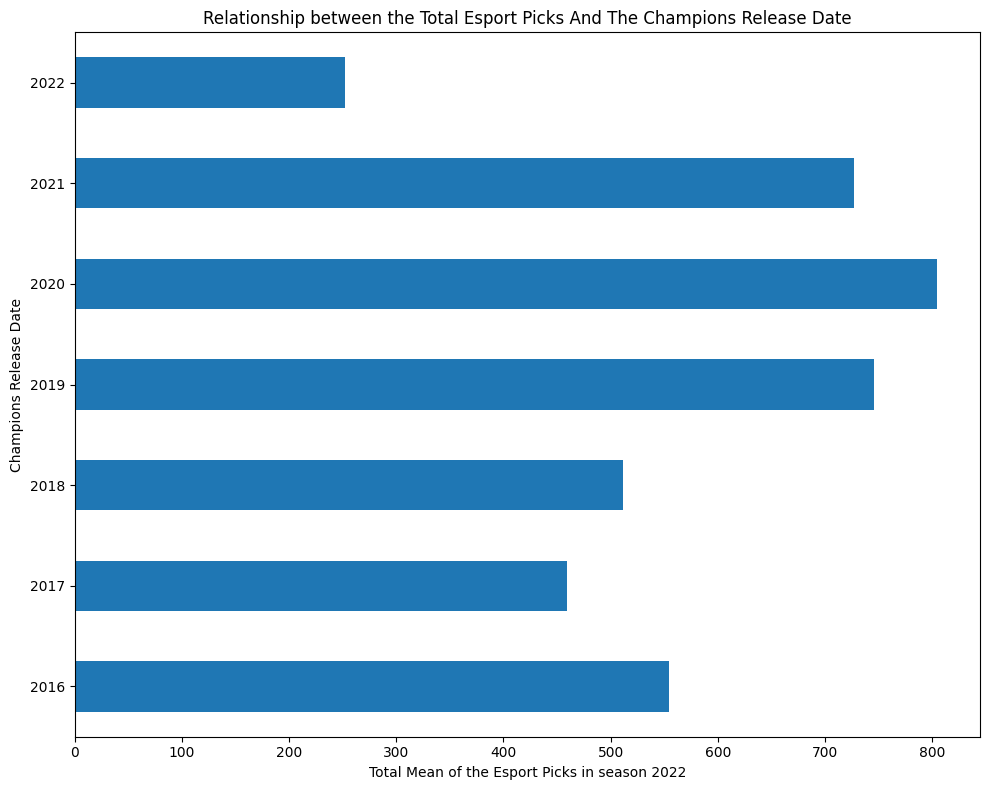

In [103]:
# Convert 'Release_Date' column to datetime
dataset_df['Release_Date'] = pd.to_datetime(dataset_df['Release_Date'])

# Group data by release year and calculate the mean of 'Total_Esport_Picks'
yearly_esport_picks = dataset_df.groupby(dataset_df['Release_Date'].dt.year)['Total_Esport_Picks'].mean()

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
yearly_esport_picks.plot(kind='barh')
plt.title('Relationship between the Total Esport Picks And The Champions Release Date')
plt.xlabel('Total Mean of the Esport Picks in season 2022')
plt.ylabel('Champions Release Date')
plt.tight_layout()
plt.show()

### 4. Main Conclusions
**Correlation betweens basic champions stats:** Regarding the existing correlations between the basic champions stats (Hp, Hp_Regen, Mana, Mana_Regen, Phy_Damage, Mag_Damage, Phy_Defence, Mag_Defence, Mov_Speed) through the analysis of the presented heatmap, there are no strong correlations within a pair of attributes. The highest correlation values in module were 0.42, 0.39 and -0.41, so since they are in the approximate range of 0.4 to 0.6 it is a moderate correlation.  Within the positive associations, the value of 0.42 refers to the correlation between movement speed and physical defence and the value of 0.39 corresponds to the correlation between a champion's life and its regeneration, Hp and Hp regen, whic makes sense in this type of games. The correlation with negative association -0.41 exists between the Mana value and the champion's Movement speed. 

**Relationship between the champion Lane and his points of life, Hp:** In this section through the boxplots of the Hp as a function of the champions' Lane I identified and explored the cases outside the IQR and the maximum and minimum of the boxplots, from which I concluded that some were outliers, (champions who did not have their correct lane), and that others were either normal cases or cases in which the Hp was shared with an armour Hp in the health bar. From the distribution of Hp by Lanes, it was possible to conclude that the champions with more Hp are mostly located in the Roam and EXP Lanes and that the champions with less Hp are in the Gold Lane, which makes sense given the type of game.

**Total existing champions in each Lane:** The Lane that counts with more champions is the EXP Lane with a total number of 35 champions, and the Lane that has the less number of champions is Jungle with 15 champions. There are 36 champions to use in the EXP Lane, 23 to the Mid Lane, 21 to the Roam Lane, 19 to the Gold Lane and 15 to the Jungle Lane.

**Number of champions for each Primary Role:** There are 33 Fighters, 25 Mages, 18 Marksmans, 16 Tanks, 13 Assasins and 9 Supports. The Primary Role that counts with more champions is Figther, and the Primary Role that counts with less champions is Support. It is also important to emphasize that some champions have Secondary Roles, for example, most of the Tanks have also a Support role.

**Relationship between the champions Lane and their Primary Role:** In this section the relationship between the two categorical variables (Lane and Primary Role) was assessed using the chi square test. From the test result, there is a strong relationship between the Primary Role of each champion and the Lane where he/she is played. The heatmap presented also in this section gives us the general information that, 92.3% of Assassins play in Jungle, 88% of Fighters play in EXP lane, 92% of Mages are used in Mid, 100% of Marksman play in Gold Lane , Supports play 100% of the time in Roam Lane and Tanks play 75% of the time in Roam Lane, with the other 25% in EXP Lane

**Mobile Legends tendency to release champions:** The year in which the most new champions came out was the year 2017, the year after the creation of the Mobile Legends game, having been the only lane in which champions from all Lanes came out (Mid, Roam, EXP, Jungle and Gold, in order descending). The year in which fewer champions came out was the year 2022, with only 4 new champions. Also curious information is that from 2018 to 2022, that is, in the 4 consecutive years, the Lane for which more champions were made within those years was the EXP Lane.

**Mobile Legends release and first year champions:** In the first Mobile Legends's year there were 24 initial champions, 6 Junglers, 5 Roamers, 5 EXP, 4 Gold laners and 4 Mid: 'Akai', 'Alice', 'Alucard', 'Balmond', 'Bane', 'Bruno', 'Chou', 'Clint', 'Eudora', 'Fanny', 'Franco', 'Freya', 'Gord', 'Hayabusa', 'Kagura', 'Karina', 'Layla', 'Lolita', 'Minotaur', 'Miya', 'Nana', 'Natalia', 'Rafaela', 'Zilong'.

**Most recent champion until 2022:** The most recent champion until 2022 is Fredrinn, relesead in 2022-08-12. 

**Best and Worst basic attack champions:** The champion with highest basic attack damage is Bruno (Gold Laner, Marksman) and the champion with the lowest basc attack damage is Aulus (EXP Laner, Fighter) 

**Champions that don't use mana:** The champions that don´t use mana are: 'Alucard', 'Argus', 'Badang', 'Balmond', 'Beatrix', 'Chou', 'Dyrroth', 'Edith', 'Fredrinn', 'Freya', 'Gatotkaca', 'Granger', 'Guinevere', 'Hanzo', 'Hilda', 'Irithel', 'Johnson', 'Khaleed', 'Lapu-Lapu', 'Leomord', 'Martis', 'Masha', 'Minotaur', 'Paquito', 'Thamuz', 'X.Borg', 'Yin', 'Yu_Zhong'.

**Most and less picked champion by pro players:** The champion most picked by pro players in the 2022 season was Esmeralda, and the champion less picked by pro players was Fredrinn, which is the more recent champion until 2022.

**Champions chosen above and below the mean of total picks:** The mean of the total picks champions was 580, so, the champions picked above the mean are: 'Akai', 'Alice', 'Balmond', 'Barats', 'Baxia', 'Beatrix', 'Benedetta', 'Brody', 'Cecilion', 'Chou', 'Claude', 'Clint', 'Diggie', 'Dyrroth', 'Esmeralda', 'Franco', 'Granger', 'Grock', 'Hayabusa', 'Jawhead', 'Kagura', 'Karina', 'Karrie', 'Khufra', 'Lancelot', 'Ling', 'Lolita', 'Lunox', 'Lylia', 'Mathilda', 'Masha', 'Pharsa', 'Phoveus', 'Popol_and_Kupa', 'Paquito', 'Rafaela', 'Roger', 'Ruby', 'Selena', 'Thamuz', 'Uranus', 'Wanwan', 'X.Borg', 'Yi_Sun-Shin', 'Yu_Zhong', 'Yve', and the champions below mean picked are: 'Aamon', 'Aldous', 'Alpha', 'Alucard', 'Angela', 'Argus', 'Atlas', 'Aurora', 'Aulus', 'Badang', 'Bane', 'Belerick', 'Bruno', 'Carmilla', "Chang'e", 'Cyclops', 'Edith', 'Estes', 'Eudora', 'Fanny', 'Faramis', 'Floryn', 'Fredrinn', 'Freya', 'Gatotkaca', 'Gloo', 'Gord', 'Guinevere', 'Gusion', 'Hanabi', 'Hanzo', 'Harith', 'Harley', 'Helcurt', 'Hilda', 'Hylos', 'Irithel', 'Johnson', 'Julian', 'Kadita', 'Kaja', 'Khaleed', 'Kimmy', 'Lapu-Lapu', 'Layla', 'Leomord', 'Lesley', 'Luo_Yi', 'Martis', 'Melissa', 'Minotaur', 'Minsitthar', 'Miya', 'Moskov', 'Nana', 'Natan', 'Natalia', 'Odette', 'Silvanna', 'Terizla', 'Vale', 'Valentina', 'Valir', 'Vexana', 'Xavier', 'Yin', 'Zhask', 'Zilong'.

**Above mean played champions with the highest win rate:** The champions with the highest win rate (per Lane) and highest pick rate are: Franco (Roamer), WanWan (Gold Lane), YI:Sun - Shim (Jungler), Yve (Mid), and Masha (EXP Lane). From the list of the above mean played, the maximum win rate is 57.41% and the minimum win rate is 50.18%. The descending order of these champions are:'Franco', 'Wanwan', 'Lolita', 'Yi_Sun-Shin', 'Yve', 'Masha', 'Dyrroth', 'Phoveus', 'Paquito', 'Chou', 'Hayabusa', 'Lancelot', 'Claude', 'Beatrix', 'Lylia', 'Khufra', 'Lunox', 'Alice', 'Uranus', 'Akai', 'Mathilda', 'Ling', 'Popol_and_Kupa', 'Karina', 'Benedetta', 'Clint'.

**Above mean played champions with the lowest win rate:** The champions with the lowest win rate (per Lane) and highest pick rate are: Pharsa (Mid), Brody (Gold Lane), Thamuz (EXP Lane), Baxia (Roamer), and Selena (Jungler). From the list of the above mean played, the maximum win rate is 49.81% and the minimum win rate is 44.42%. The descending order of these champions are: 'Pharsa', 'Brody', 'Thamuz', 'X.Borg', 'Baxia', 'Kagura', 'Jawhead', 'Grock', 'Barats', 'Selena', 'Yu_Zhong', 'Balmond', 'Rafaela', 'Esmeralda', 'Granger', 'Roger', 'Ruby', 'Diggie', 'Karrie', 'Cecilion'.

**Below mean played champions with the highest win rate:** The champions with the highest win rate (per Lane) and lowest pick rate are: Faramis (Roamer), Kadita (Mid), Moya (Gold Lane), Yin (EXP Lane), and Aamons (Jungler). From the list of the below mean played, the maximum win rate is 57.85% and the minimum win rate is 50.58%. The descending order of these champions are: 'Faramis', 'Kadita', 'Miya', 'Vexana', 'Moskov', 'Hanabi', 'Eudora', 'Yin', 'Kimmy', 'Layla', 'Luo_Yi', 'Julian', 'Harith', 'Gloo', 'Atlas', 'Xavier', 'Estes', 'Valentina', 'Natan', 'Aurora', 'Badang', 'Khaleed', 'Silvanna', 'Aulus', 'Irithel', 'Aldous', 'Valir', 'Aamon'.

**Below mean played champions with the lowest win rate:** The champions with the lowest win rate (per Lane) and lowest pick rate are: Kaja (EXP Lane), Johnson (Roamer), Harley (Mid), Helcurt (Jungler), and Melissa (Gold Lane). From the list of the below mean played, the maximum win rate is 49.82% and the minimum win rate is 0% that correspond to Fredrinn. The descending order of these champions are: 'Kaja', 'Johnson', 'Terizla', 'Harley', 'Helcurt', 'Fanny', 'Gatotkaca', 'Edith', 'Lapu-Lapu', 'Vale', 'Melissa', 'Gusion', 'Martis', 'Bane', 'Hylos', 'Hilda', 'Zhask', 'Belerick', 'Angela', "Chang'e", 'Cyclops', 'Leomord', 'Alpha', 'Guinevere', 'Nana', 'Carmilla', 'Alucard', 'Minsitthar', 'Gord', 'Hanzo', 'Lesley', 'Floryn', 'Odette', 'Freya', 'Argus', 'Zilong', 'Fredrinn'.

**Relationship between the pro players champion picks and the champion release date - 2022 season:** Analysing the horizontal barplot, it is cleary visible that pro players in this 2022 season played and chose more champions whose release date is between 2019 and 2021 which is an interesting fact. The champions least used by professionals, on average, are the champions whose release date was in the current esports year, season 2022. The champions released in the first year of Mobile Legends, 2016, are also frequently used, but with less frequency that the 2019, 2020 and 2021 years. 